Available chromosomes: ['.']


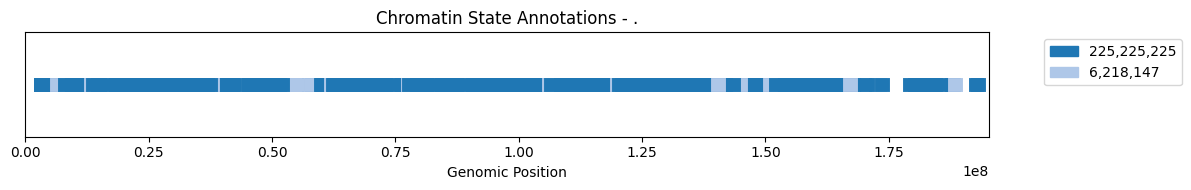

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load BED file
bed_file = "ENCFF283OIW.bed"
columns = ["chrom", "start", "end", "state"]
df = pd.read_csv(bed_file, sep='\t', header=None, names=columns)

# Show available chromosomes
print("Available chromosomes:", df["chrom"].unique())

# Pick a chromosome that exists in the file
target_chrom = df["chrom"].unique()[0]  # default to first one
df_chr = df[df["chrom"] == target_chrom].reset_index(drop=True)

if df_chr.empty:
    print(f"No entries found for chromosome: {target_chrom}")
else:
    # Assign each unique state a color
    unique_states = df_chr["state"].unique()
    colors = plt.cm.tab20.colors[:len(unique_states)]
    state_color_map = dict(zip(unique_states, colors))

    # Plot
    fig, ax = plt.subplots(figsize=(12, 2))
    for _, row in df_chr.iterrows():
        ax.plot([row["start"], row["end"]], [1, 1], linewidth=10, color=state_color_map[row["state"]])

    # Add legend
    patches = [mpatches.Patch(color=color, label=state) for state, color in state_color_map.items()]
    ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

    ax.set_title(f"Chromatin State Annotations - {target_chrom}")
    ax.set_xlabel("Genomic Position")
    ax.set_yticks([])
    ax.set_xlim(df_chr["start"].min(), df_chr["end"].max())
    plt.tight_layout()
    plt.show()


Not enough unique signal values to compute chromatin states.
